# Exploratory Data Analysis

**Notebook Objectives** <br>
- Understand customer conversion patterns and key success drivers
- Identify high-value customer segments for targeted marketing
- Discover campaign optimization opportunities (timing, frequency, duration)
- Generate actionable insights for business strategy and model features

**Notebook Structure** <br>
1. Importing Libraries
2. Data Loading, Overview and cleaning
3. Customer Demographics Analysis
4. Campaign Behavior Deep Dive
5. Financial Characteristics
6. Temporal & Seasonal Patterns

## Importing Libraries

In [1]:
import sys
import os
notebook_dir = os.path.dirname(os.getcwd())
sys.path.append(notebook_dir)
from utils import data_cleaning
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


## Data Loading & Overview

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 


### Metadata
checking what's in the metadata

In [3]:
# Extract metadata & Convert metadata dict to DataFrame
metadata = bank_marketing.metadata
additional_info = metadata.pop("additional_info", {})  # remove it from metadata to get summary
metadata_bank_marketing = pd.DataFrame(list(metadata.items()), columns=['Key', 'Value'])

### DATASET SUMMARY FROM METADATA

In [4]:
# convert additional info from metadata into DataFrame
additional_bank_marketing = pd.DataFrame(list(additional_info.items()), columns=["Key", "Value"])
summary = additional_bank_marketing[additional_bank_marketing['Key']=='summary']['Value'][0]
print(summary)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict i

### DATASET OVERVIEW

In [7]:
# Extract data & convert data dict to DataFrame
data = bank_marketing.data
data_content     = pd.DataFrame(list(data.items()), columns=['Key', 'Value'])['Key']
raw_original_dataset = data.original
headers          = data.headers 

--- Dataset Overview ---
Shape: (45211, 17)
Memory Usage: 24.56 MB
Duplicate Rows: 0

--- Missing Values ---
- Age: 0 missing values
- Job: 288 missing values
- Marital: 0 missing values
- Education: 1857 missing values
- Default: 0 missing values
- Balance: 0 missing values
- Housing: 0 missing values
- Loan: 0 missing values
- Contact: 13020 missing values
- Day_of_week: 0 missing values
- Month: 0 missing values
- Duration: 0 missing values
- Campaign: 0 missing values
- Pdays: 0 missing values
- Previous: 0 missing values
- Poutcome: 36959 missing values
- Y: 0 missing values

--- Data Types ---
- object: 10 columns
- int64: 7 columns

--- Outlier Counts ---
- Age: 381 outliers
- Balance: 745 outliers
- Day_of_week: 0 outliers
- Duration: 963 outliers
- Campaign: 840 outliers
- Pdays: 1723 outliers
- Previous: 582 outliers


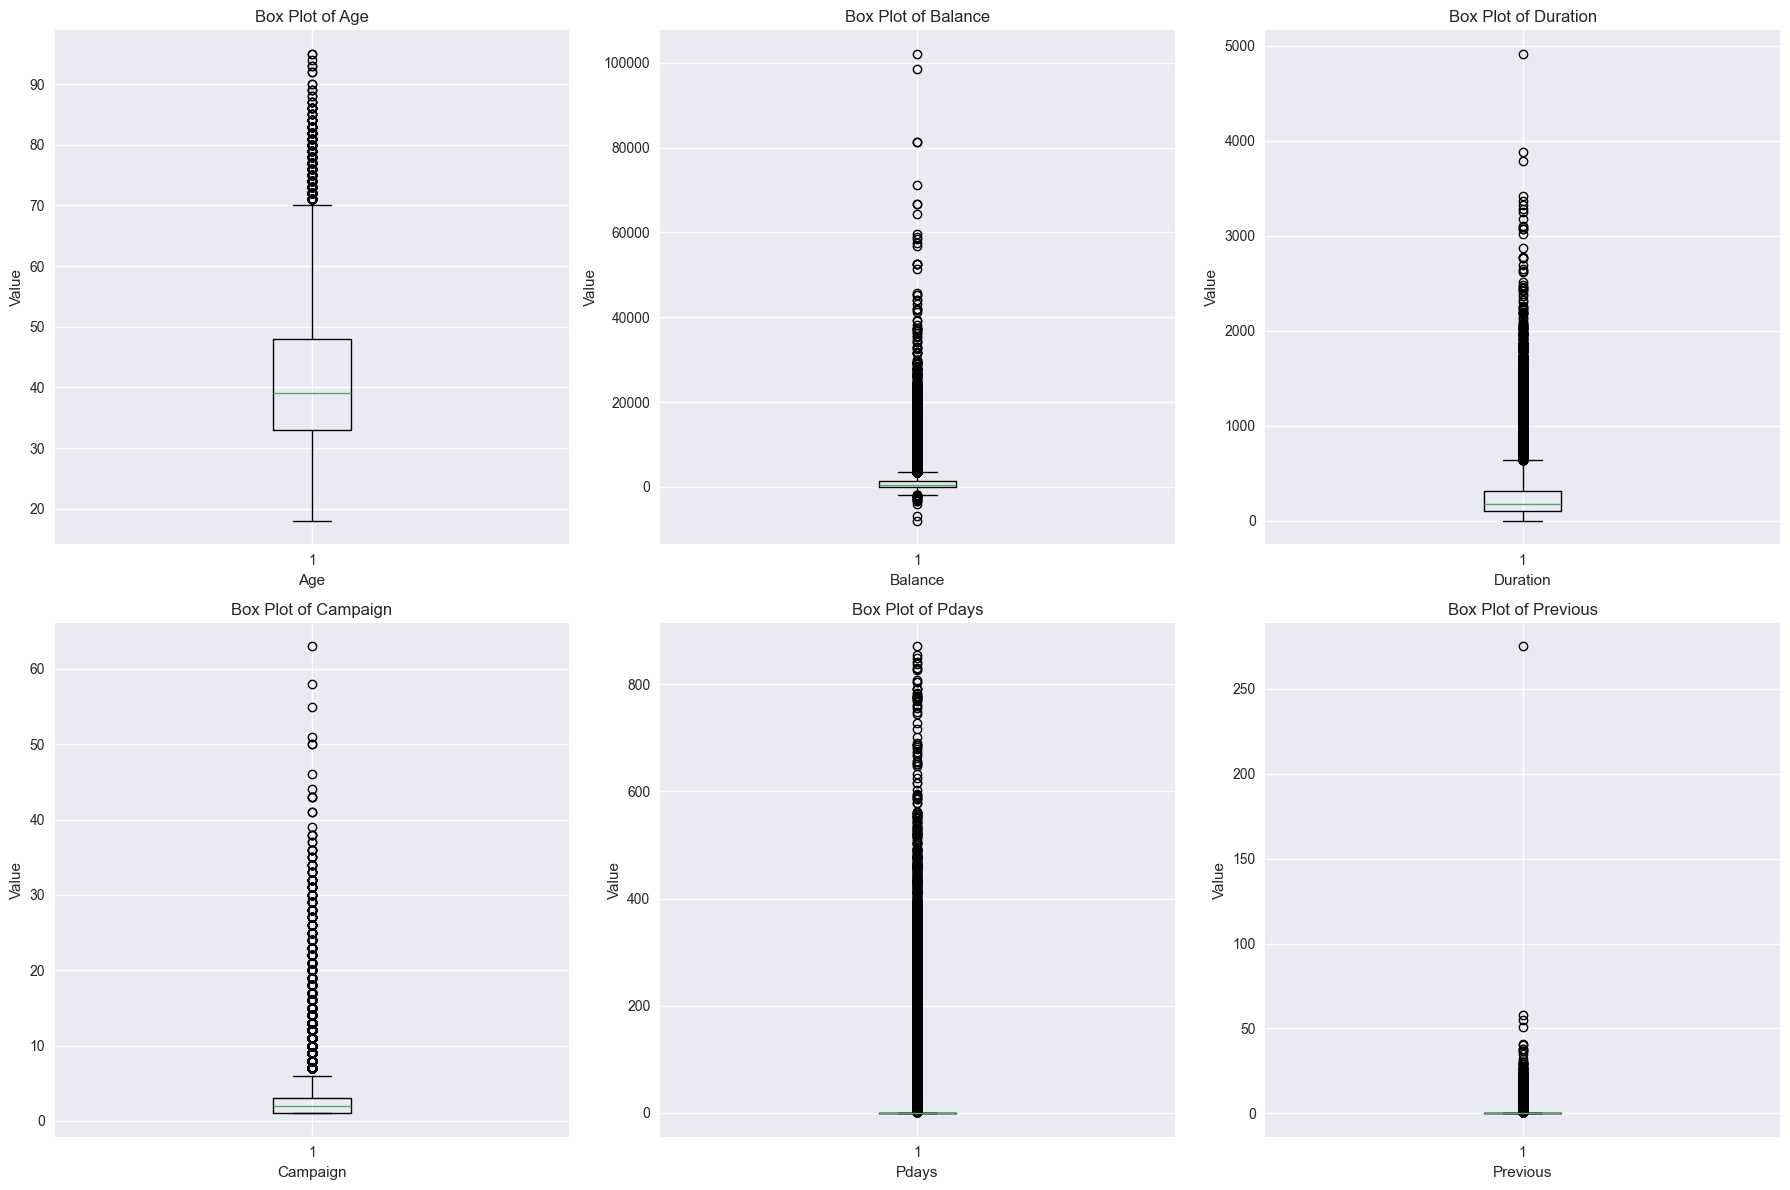

['Capped 13 campaign outliers at 40']


In [8]:
original_dataset = data_cleaning.complete_data_cleaning_pipeline(raw_original_dataset)

#### Checking the data content

In [9]:
list(data_content)

['ids', 'features', 'targets', 'original', 'headers']

#### Target Distribution

In [10]:
print(f"Shape: {original_dataset.shape}")
print(f"Memory usage: {original_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Missing values: {original_dataset.isnull().sum().sum()}")

Shape: (45211, 17)
Memory usage: 25.75 MB
Missing values: 0


#### Variables Description

In [11]:
print(f"{list(headers)}")
display(pd.DataFrame(bank_marketing.variables))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,"contact communication type (categorical: 'cellular','telephone')",None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


In [12]:
# Display first few rows
print("\nFirst 5 rows:")
display(original_dataset.head())
# Data types and basic info
print("\nData Types:")
original_dataset.info()


First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Target Distribution

In [13]:
target_counts = original_dataset['y'].value_counts()
target_pct    = original_dataset['y'].value_counts(normalize=True) * 100
print(f"No:  {target_counts['no']:>6,} ({target_pct['no']:>5.1f}%)")
print(f"Yes: {target_counts['yes']:>6,} ({target_pct['yes']:>5.1f}%)")
print(f"Class Imbalance Ratio: {target_counts['no'] / target_counts['yes']:.1f}:1")

No:  39,922 ( 88.3%)
Yes:  5,289 ( 11.7%)
Class Imbalance Ratio: 7.5:1


#### Missing values Check

In [14]:
missing_values = original_dataset.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values detected")
else:
    print("Missing values found:")
    print(missing_values[missing_values > 0])


No missing values detected


## Customer Demographics Analysis

In [15]:
def success_rates(column):
    # Age group success rates
    
    original_dataset = original_dataset.copy()
    analysis = original_dataset.groupby(column).agg({
        'y': ['count', lambda x: (x == 'yes').mean() * 100]
    }).round(2)
    
    analysis.columns = ['count', 'success_rate']
    analysis = analysis.sort_values('success_rate', ascending=False)
    display(analysis)
  
    print(f"\nSuccess rates by {column}")
    for idx, row in analysis.iterrows():
        print(f"{idx}: {row['success_rate']:>5.1f}% success rate ({int(row['count']):,} customers)")

    
    # Find best performing age group
    best_group = analysis['success_rate'].idxmax()
    best_rate = analysis['success_rate'].max()
    print(f"\n We can see that: {best_group} group has highest conversion: {best_rate:.1f}%")
    

- **Age patterns**

Age range: 18 - 95 years
Average age: 40.9 ± 10.6 years
Median age: 39 years


,count,success_rate
age_group,,
65+,751,42.61
18-25,1336,23.95
56-65,4149,14.12
26-35,15571,12.00
36-45,13856,9.39
46-55,9548,9.35



Success rates by age_group
65+:  42.6% success rate (751 customers)
18-25:  23.9% success rate (1,336 customers)
56-65:  14.1% success rate (4,149 customers)
26-35:  12.0% success rate (15,571 customers)
36-45:   9.4% success rate (13,856 customers)
46-55:   9.3% success rate (9,548 customers)

 We can see that: 65+ group has highest conversion: 42.6%


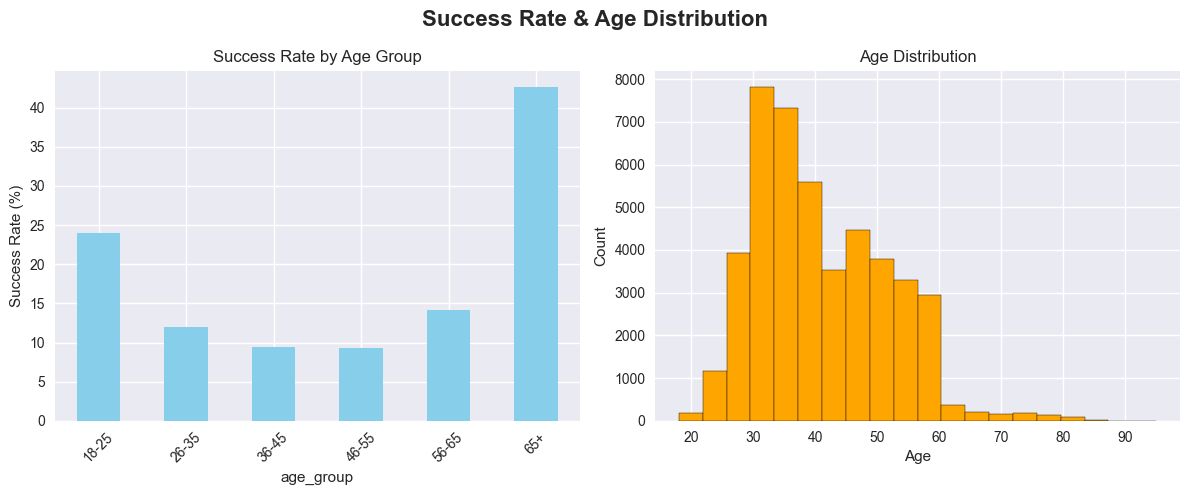

In [16]:
age_stats = original_dataset['age'].describe()
print(f"Age range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
print(f"Average age: {age_stats['mean']:.1f} ± {age_stats['std']:.1f} years")
print(f"Median age: {age_stats['50%']:.0f} years")

# Create age groups for analysis
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
original_dataset['age_group'] = pd.cut(original_dataset['age'], bins=age_bins, labels=age_labels)
success_rates('age_group')

# Success rate by age group
success_rate = original_dataset.groupby('age_group')['y'].apply(lambda x: (x == 'yes').mean() * 100)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # make it wider
fig.suptitle('Success Rate & Age Distribution', fontsize=16, fontweight='bold')

# Left: success rate bar chart
success_rate.plot(kind='bar', ax=axes[0], color='skyblue', rot=45)
axes[0].set_ylabel('Success Rate (%)')
axes[0].set_title("Success Rate by Age Group")

# Right: age distribution histogram
axes[1].hist(original_dataset['age'], bins=20, color='orange', edgecolor='black')
axes[1].set_title("Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



Inisight:<br>
- Customers aged 65+ have a much higher success rate in opening term deposits compared to younger groups.
- Even though they represent a smaller share of the customer base, their willingness to convert makes them a high-efficiency target for the campaign.
<br> Call to Action:
- Prioritize the 65+ segment in call campaigns to maximize conversion efficiency.
- Design retirement-focused messaging (secure savings, stable returns, legacy planning) to resonate with their needs.
- Dedicate a larger share of limited call-center resources to this group first, then expand to other segments as capacity allows.

- **Job categories**

,count,success_rate
job,,
student,938,28.68
retired,2264,22.79
unemployed,1303,15.50
management,9458,13.76
admin.,5171,12.20
self-employed,1579,11.84
unknown,288,11.81
technician,7597,11.06
services,4154,8.88



Success rates by job
student:  28.7% success rate (938 customers)
retired:  22.8% success rate (2,264 customers)
unemployed:  15.5% success rate (1,303 customers)
management:  13.8% success rate (9,458 customers)
admin.:  12.2% success rate (5,171 customers)
self-employed:  11.8% success rate (1,579 customers)
unknown:  11.8% success rate (288 customers)
technician:  11.1% success rate (7,597 customers)
services:   8.9% success rate (4,154 customers)
housemaid:   8.8% success rate (1,240 customers)
entrepreneur:   8.3% success rate (1,487 customers)
blue-collar:   7.3% success rate (9,732 customers)

 We can see that: student group has highest conversion: 28.7%


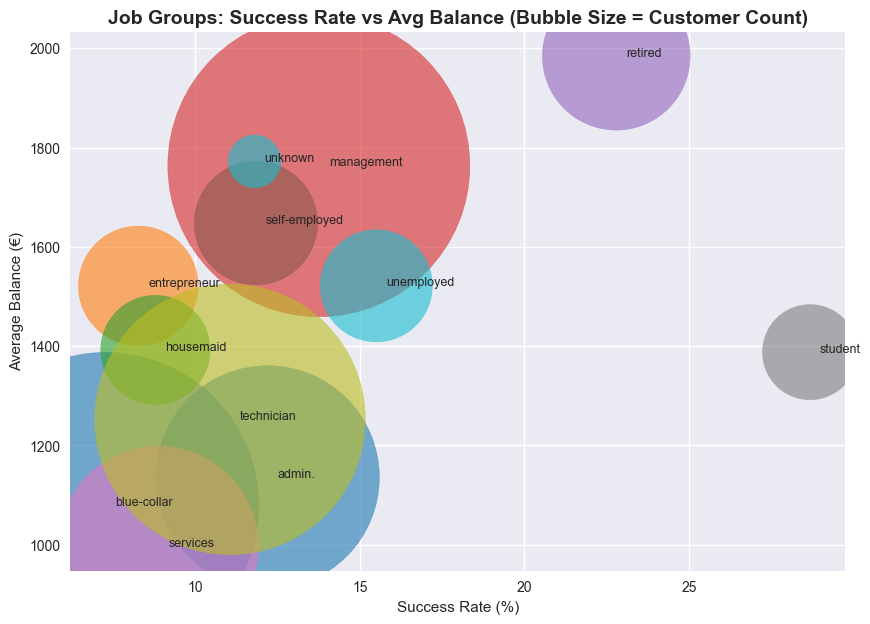

In [17]:
success_rates('job')

# Aggregate metrics
job_stats = original_dataset.groupby('job').agg(
    success_rate=('y', lambda x: (x == 'yes').mean() * 100),
    avg_balance=('balance', 'mean'),
    count=('job', 'size')
).reset_index()

# Bubble plot
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    job_stats['success_rate'],
    job_stats['avg_balance'],
    s=job_stats['count']*5,  #
    alpha=0.6,
    c=range(len(job_stats)),  # 
    cmap='tab10'
)

# Labels
for i, row in job_stats.iterrows():
    plt.text(row['success_rate']+0.3, row['avg_balance'], row['job'], fontsize=9)

plt.title("Job Groups: Success Rate vs Avg Balance (Bubble Size = Customer Count)", fontsize=14, weight='bold')
plt.xlabel("Success Rate (%)")
plt.ylabel("Average Balance (€)")
plt.grid(True)
plt.show()


Isights:
- Blue-collar workers make up the largest share of the dataset → big volume but low conversion rate.
- Students have the highest conversion rate → easier to convince, but their balances are typically smaller.
- Entrepreneurs show the highest expected deposit value → fewer in number, but when they say yes, they bring in large balances.

Call to Action:
- Don’t just target the largest group (blue-collar) → they consume resources but deliver poor ROI.
- Prioritize entrepreneurs for high-value deposits and students for easy wins + long-term customer lifetime value (CLV).
- Build a hybrid targeting strategy:
    - High ROI: Entrepreneurs → maximize immediate revenue.
    - High Conversion: Students → boost campaign success rate and future growth.
    - Low Priority: Blue-collar → only target if extra capacity remains.

- **Education level**

,count,success_rate
education,,
tertiary,13301,15.01
unknown,1857,13.57
secondary,23202,10.56
primary,6851,8.63



Success rates by education
tertiary:  15.0% success rate (13,301 customers)
unknown:  13.6% success rate (1,857 customers)
secondary:  10.6% success rate (23,202 customers)
primary:   8.6% success rate (6,851 customers)

 We can see that: tertiary group has highest conversion: 15.0%


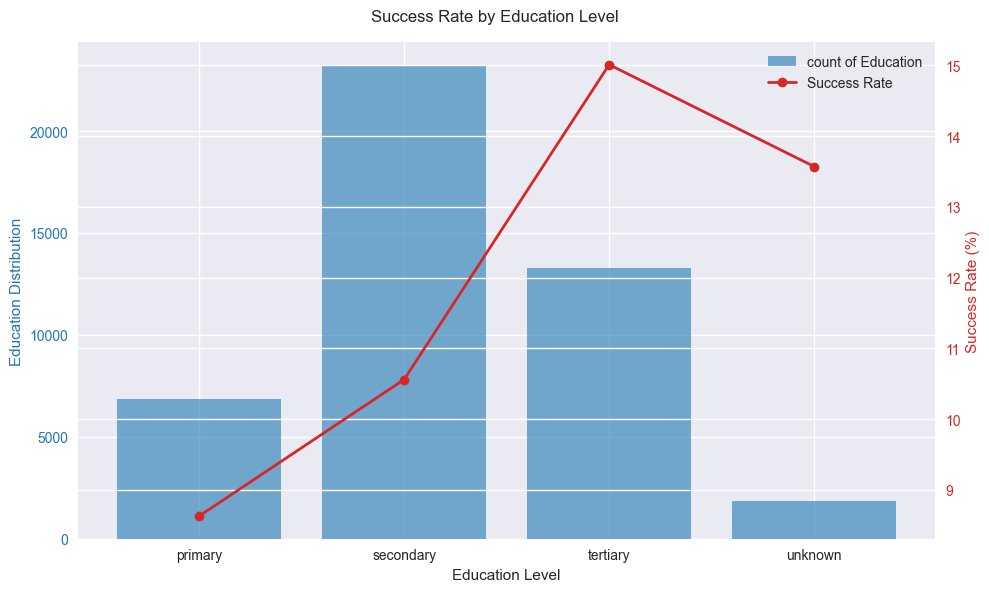

In [18]:
success_rates('education')
# Success rate by age group
success_rate = original_dataset.groupby('education')['y'].apply(lambda x: (x == 'yes').mean() * 100)


# Create the plot
analysis = original_dataset.groupby('education').agg({
    'y': ['count', lambda x: (x == 'yes').mean() * 100]
}).round(2)
analysis.columns = ['count', 'success_rate']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the count as a bar chart
color = 'tab:blue'
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Education Distribution', color=color)
ax1.bar(list(analysis.index), analysis['count'], color=color, alpha=0.6, label='count of Education')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the success rate line plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Success Rate (%)', color=color)
ax2.plot(list(analysis.index), analysis['success_rate'], color=color, marker='o', linewidth=2, label='Success Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
fig.suptitle('Success Rate by Education Level')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

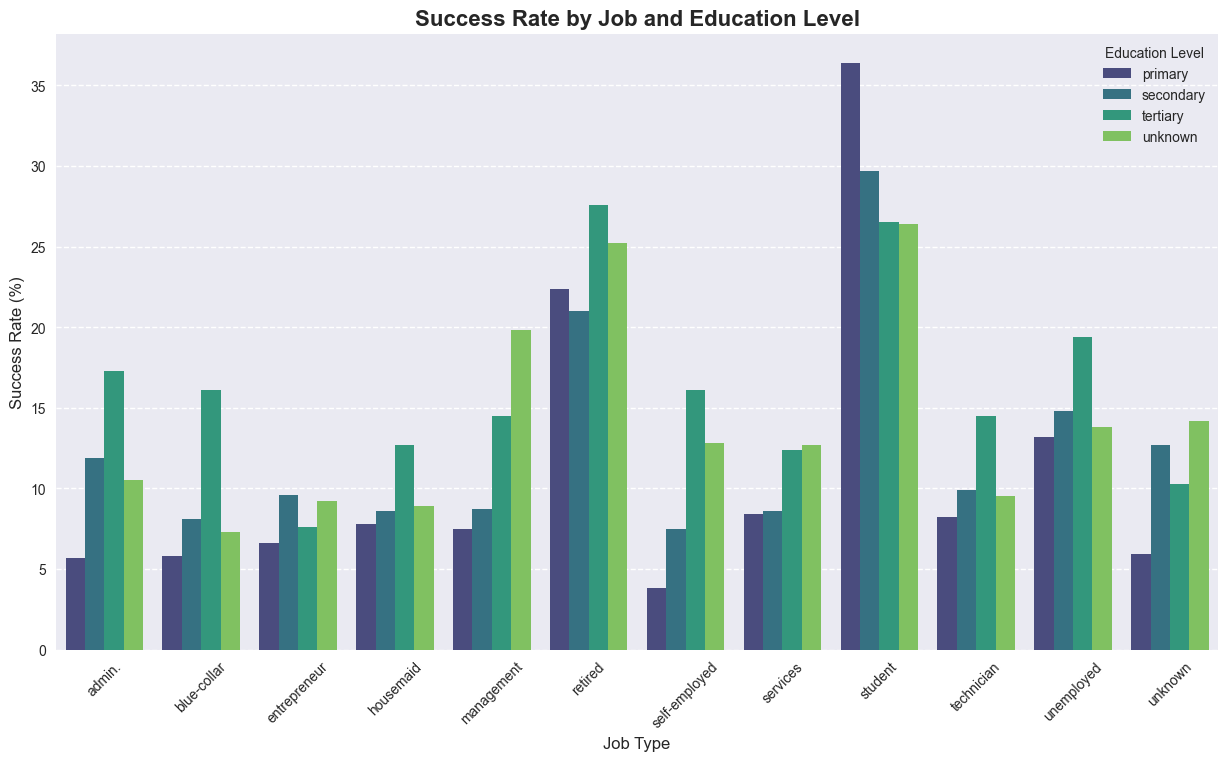

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Analysis ---
# Group by both job and education to calculate success rates
job_education_analysis = original_dataset.groupby(['job', 'education']).agg(
    success_rate=('y', lambda x: (x == 'yes').mean() * 100)
).round(1).reset_index()

# For clarity in plotting, let's focus on the most common job types

jobs_to_plot = job_education_analysis['job'].unique()
plot_data = job_education_analysis[job_education_analysis['job'].isin(jobs_to_plot)]

# --- Visualization ---
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_data, x='job', y='success_rate', hue='education', palette='viridis',
            order=jobs_to_plot)

plt.title('Success Rate by Job and Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Insights:
- people with a tertiary education have the highest success rate for opening a deposit account, at 18.63%.
- This indicates that calling customers with a tertiary education is the most efficient use of call center resources for securing new contracts.

Call to Action:
The calling order should be:
- Tertiary Education: Call this group first to secure the highest return on investment per call.
    - and in this group you can start by retired people. as in the second chart.
- Primary Education: After exhausting the Tertiary education group, move on to this segment, as they have the second-highest success rate.
- Secondary Education: This group should be called last due to its lower conversion rate, saving call center resources for more promising leads.

- **Marital status**

,count,success_rate
marital,,
single,12790,14.95
divorced,5207,11.95
married,27214,10.12



Success rates by marital
single:  14.9% success rate (12,790 customers)
divorced:  11.9% success rate (5,207 customers)
married:  10.1% success rate (27,214 customers)

 We can see that: single group has highest conversion: 14.9%


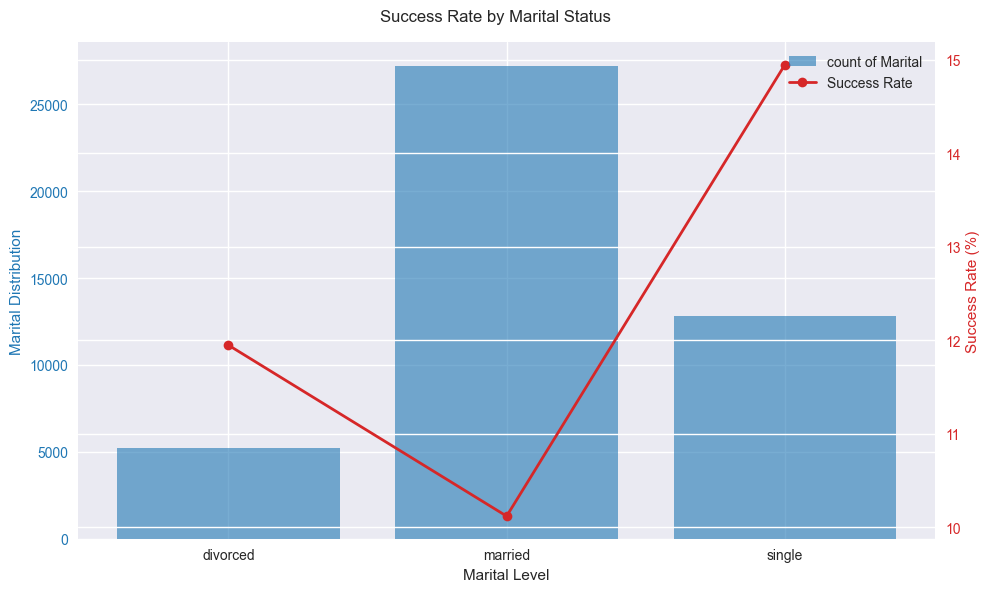

In [20]:
success_rates('marital')

# Success rate by age group
success_rate = original_dataset.groupby('marital')['y'].apply(lambda x: (x == 'yes').mean() * 100)


# Create the plot
analysis = original_dataset.groupby('marital').agg({
    'y': ['count', lambda x: (x == 'yes').mean() * 100]
}).round(2)
analysis.columns = ['count', 'success_rate']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the count as a bar chart
color = 'tab:blue'
ax1.set_xlabel('Marital Level')
ax1.set_ylabel('Marital Distribution', color=color)
ax1.bar(list(analysis.index), analysis['count'], color=color, alpha=0.6, label='count of Marital')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the success rate line plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Success Rate (%)', color=color)
ax2.plot(list(analysis.index), analysis['success_rate'], color=color, marker='o', linewidth=2, label='Success Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
fig.suptitle('Success Rate by Marital Status')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

## Campaign Behavior Deep Dive


Funnel Data:
                         Step   Count
0             Total Customers   45211
1                 Total Calls  124848
2  Previous Success Customers    1511
3           Final Conversions    5289


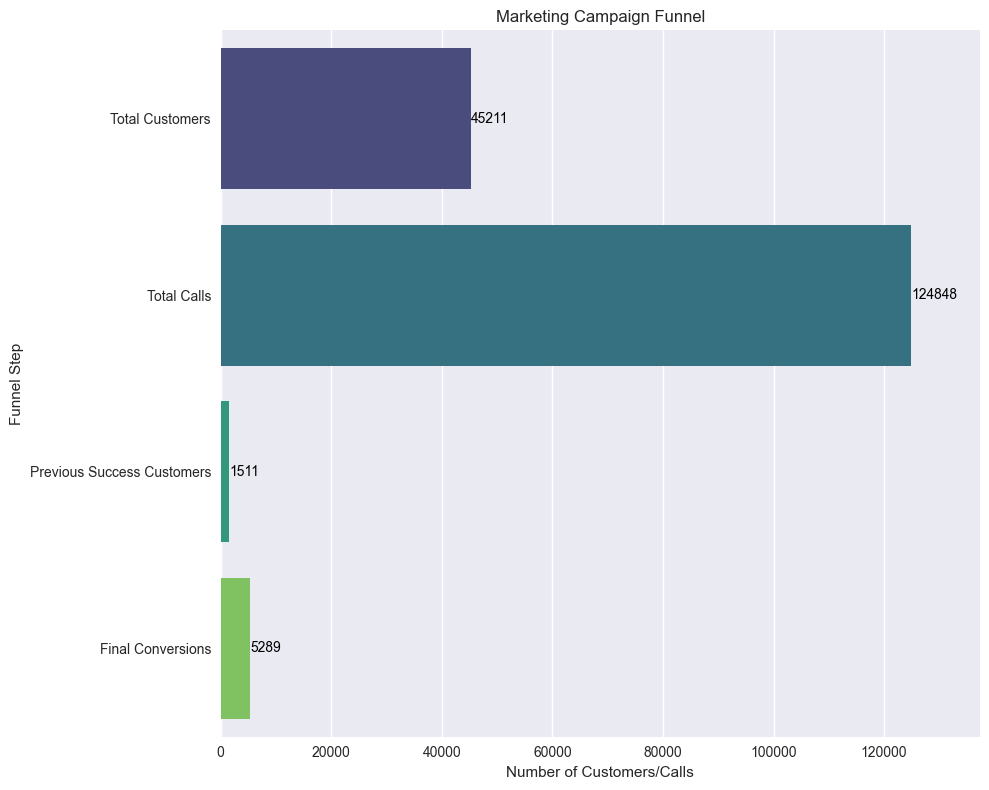

In [21]:

# Define the funnel steps based on the provided data attributes
# Step 1: All customers
total_customers = len(original_dataset)

# Step 2: Total number of calls (contacts)
total_calls = original_dataset['campaign'].sum()

# Step 3: Customers who had a successful previous outcome
prev_success_customers = original_dataset[original_dataset['poutcome'] == 'success']['y'].count()

# Step 4: Final conversions
final_conversions = original_dataset[original_dataset['y'] == 'yes']['y'].count()

# Create a DataFrame for the funnel
funnel_data = {
    'Step': ['Total Customers', 'Total Calls', 'Previous Success Customers', 'Final Conversions'],
    'Count': [total_customers, total_calls, prev_success_customers, final_conversions]
}
funnel_original_dataset = pd.DataFrame(funnel_data)

print("\nFunnel Data:")
print(funnel_original_dataset)

# Plotting the funnel
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Count', y='Step', data=funnel_original_dataset, palette='viridis')
plt.title('Marketing Campaign Funnel')
plt.xlabel('Number of Customers/Calls')
plt.ylabel('Funnel Step')

# Add labels to the bars
for index, row in funnel_original_dataset.iterrows():
    ax.text(row['Count'] + 100, index, f"{row['Count']}", color='black', ha="left", va="center")

plt.xlim(0, funnel_original_dataset['Count'].max() * 1.1)
plt.tight_layout()
plt.show()

Most customers drop off along the way. calling everyone isn't efficient.
- Insight: The campaign has a massive drop-off, converting a very small percentage of calls into new accounts. The current high-volume, low-targeting strategy is inefficient.
- Call to Action: Transition to a data-driven approach. Build a predictive model to identify high-potential customers and prioritize calls to them, maximizing efficiency and contracts secured.


- **Call duration effectiveness analysis**

In [22]:
duration_stats = original_dataset['duration'].describe()
print(f"Duration range: {duration_stats['min']:.0f} - {duration_stats['max']:.0f} seconds")
print(f"Average duration: {duration_stats['mean']:.0f} ± {duration_stats['std']:.0f} seconds")
print(f"Median duration: {duration_stats['50%']:.0f} seconds")

# Duration bins analysis
duration_bins = [0, 60, 180, 300, 600, float('inf')]
duration_labels = ['0-1min', '1-3min', '3-5min', '5-10min', '10min+']
original_dataset['duration_group'] = pd.cut(original_dataset['duration'], bins=duration_bins, labels=duration_labels)


success_rates('duration_group')


Duration range: 0 - 4918 seconds
Average duration: 258 ± 258 seconds
Median duration: 180 seconds


,count,success_rate
duration_group,,
10min+,3790,48.36
5-10min,8484,19.15
3-5min,10277,10.92
1-3min,17894,3.91
0-1min,4763,0.19



Success rates by duration_group
10min+:  48.4% success rate (3,790 customers)
5-10min:  19.1% success rate (8,484 customers)
3-5min:  10.9% success rate (10,277 customers)
1-3min:   3.9% success rate (17,894 customers)
0-1min:   0.2% success rate (4,763 customers)

 We can see that: 10min+ group has highest conversion: 48.4%


- Contact frequency optimization

## Financial Characteristics

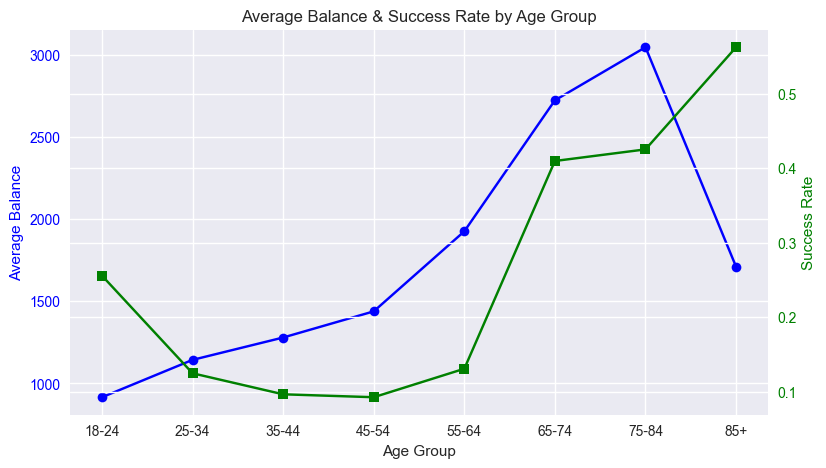

In [23]:


# Assume original_dataset has 'age', 'balance', and 'y' (target: yes/no)

# 1. Create age bins
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]
original_dataset["age_group"] = pd.cut(original_dataset["age"], bins=bins, labels=labels, right=False)

# 2. Aggregate metrics
agg = original_dataset.groupby("age_group").agg(
    avg_balance=("balance", "mean"),
    success_rate=("y", lambda x: (x == "yes").mean())  # success ratio
).reset_index()

# 3. Plot
fig, ax1 = plt.subplots(figsize=(9,5))

# Line 1: average balance
ax1.plot(agg["age_group"], agg["avg_balance"], marker="o", color="blue", label="Avg Balance")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Average Balance", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Line 2: success rate (on second y-axis)
ax2 = ax1.twinx()
ax2.plot(agg["age_group"], agg["success_rate"], marker="s", color="green", label="Success Rate")
ax2.set_ylabel("Success Rate", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Title and grid
plt.title("Average Balance & Success Rate by Age Group")
ax1.grid(True)

plt.show()


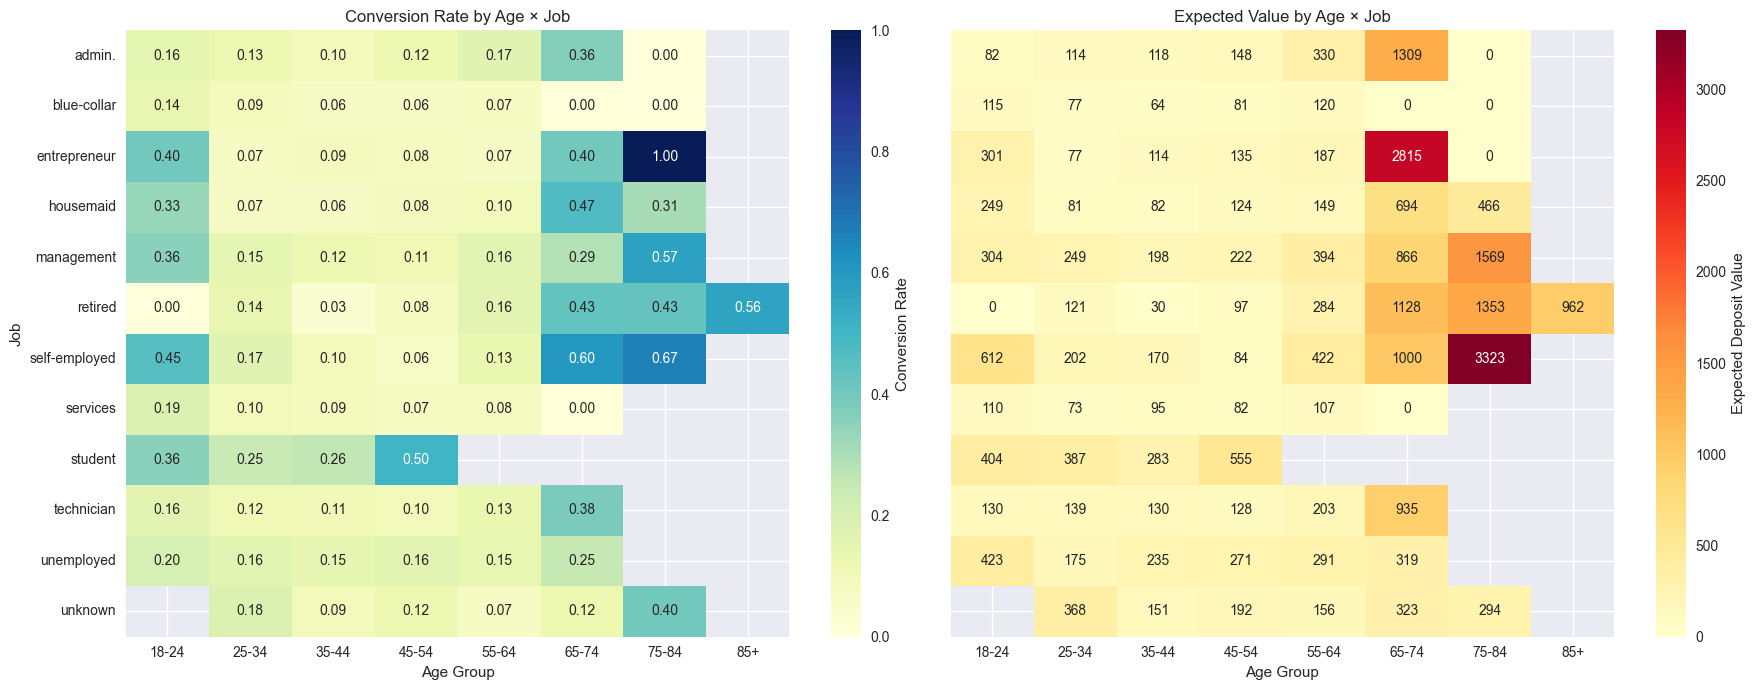

In [24]:

# 1. Age bins
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]
original_dataset["age_group"] = pd.cut(original_dataset["age"], bins=bins, labels=labels, right=False)


# 2. Aggregate metrics
agg = original_dataset.groupby(["age_group", "job"]).agg(
    conversion_rate=("y", lambda x: (x == "yes").mean()),
    avg_balance=("balance", "mean")
).reset_index()

agg["expected_value"] = agg["conversion_rate"] * agg["avg_balance"]

# 3. Pivot for heatmaps
conv_heatmap = agg.pivot(index="job", columns="age_group", values="conversion_rate")
value_heatmap = agg.pivot(index="job", columns="age_group", values="expected_value")

# 4. Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

sns.heatmap(conv_heatmap, annot=True, fmt=".2f", cmap="YlGnBu",
            cbar_kws={'label': 'Conversion Rate'}, ax=axes[0])
axes[0].set_title("Conversion Rate by Age × Job")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Job")

sns.heatmap(value_heatmap, annot=True, fmt=".0f", cmap="YlOrRd",
            cbar_kws={'label': 'Expected Deposit Value'}, ax=axes[1])
axes[1].set_title("Expected Value by Age × Job")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


The 55–74 group is the sweet spot: high balances and strong conversion rates.  they hold higher balances and also show a strong willingness to open deposits.
- Younger clients (18–24) and older clients (85+) show the highest success rates, but with smaller average balances.
- Mid-age clients (35–54) have moderate balances but are harder to convert.
- Overall, focusing on balance × success rate reveals that 55–74 delivers the best ROI for the bank.

Call to Action:
    
    - Prioritize outreach to customers aged 55–74 → this segment balances high conversion likelihood with high financial value.
        
    - Secondary targets:
    
        - 18–24 → for volume and long-term relationship building.
        - 85+ → for easy conversions, even if balances are smaller.
        - Deprioritize 35–54 unless extra call capacity is available (low success rate despite stable balances).
        - Implement a scoring system (probability of success × balance) to optimize call order dynamically.

# Temporal Analysis

from May 2008 to November 2010

In [28]:
original_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,age_group,duration_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,55-64,3-5min
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,35-44,1-3min
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,25-34,1-3min
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,45-54,1-3min
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,25-34,3-5min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,45-54,10min+
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,65-74,5-10min
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,65-74,10min+
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,55-64,5-10min


- EDA on Time-Based Features

    day_of_week  count      mean
0             1    322  0.279503
1             2   1293  0.140758
2             3   1079  0.164968
3             4   1445  0.159170
4             5   1910  0.112565
5             6   1932  0.093685
6             7   1817  0.086406
7             8   1842  0.109121
8             9   1561  0.114670
9            10    524  0.230916
10           11   1479  0.122380
11           12   1603  0.152215
12           13   1585  0.152050
13           14   1848  0.113636
14           15   1703  0.139753
15           16   1415  0.135689
16           17   1939  0.090768
17           18   2308  0.098787
18           19   1757  0.069437
19           20   2752  0.069767
20           21   2026  0.099210
21           22    905  0.170166
22           23    939  0.134185
23           24    447  0.138702
24           25    840  0.158333
25           26   1035  0.112077
26           27   1121  0.133809
27           28   1830  0.078142
28           29   1745  0.073926
29        

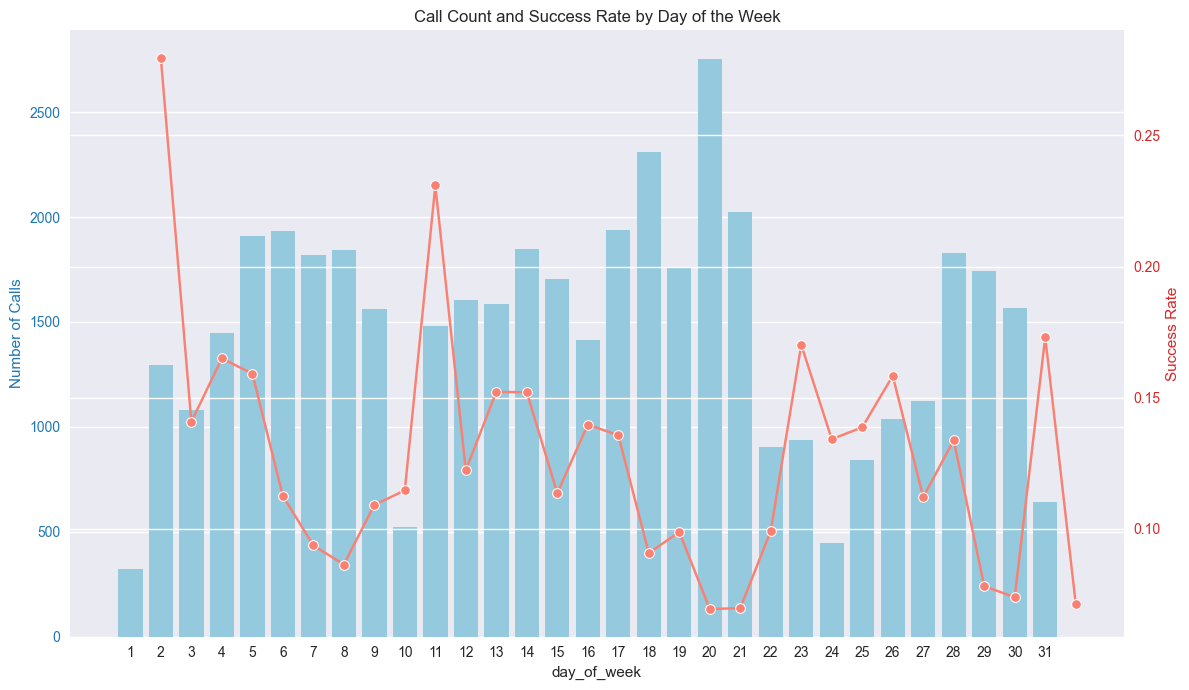

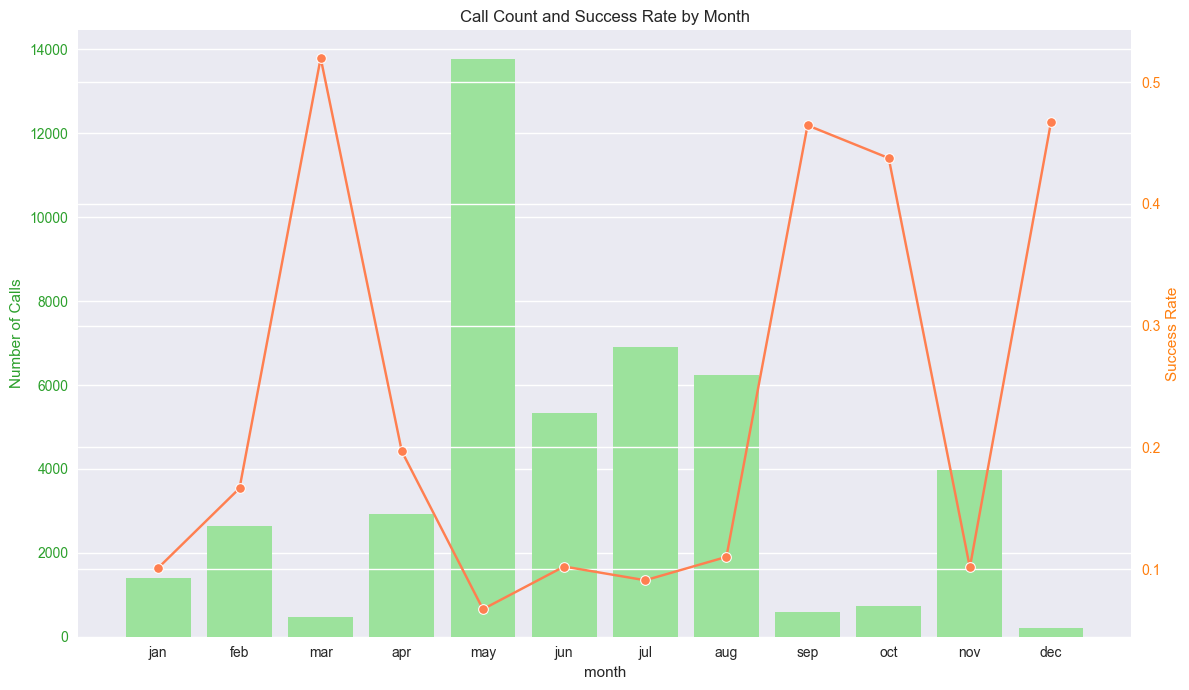

In [30]:
original_dataset['subscribed'] = original_dataset['y'].apply(lambda x: 1 if x == 'yes' else 0)
original_dataset_day = original_dataset.groupby('day_of_week')['subscribed'].agg(['count', 'mean']).reset_index()

original_dataset_day.rename(columns={'mean': 'success_rate'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(x='day_of_week', y='count', data=original_dataset_day, ax=ax1, color='skyblue')
ax1.set_ylabel('Number of Calls', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
sns.lineplot(x='day_of_week', y='success_rate', data=original_dataset_day, ax=ax2, color='salmon', marker='o', sort=False)
ax2.set_ylabel('Success Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Call Count and Success Rate by Day of the Week')
plt.tight_layout()
plt.show()

# Plot for 'month'
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
original_dataset['month'] = pd.Categorical(original_dataset['month'], categories=month_order, ordered=True)
original_dataset_month = original_dataset.groupby('month')['subscribed'].agg(['count', 'mean']).reset_index()
original_dataset_month.rename(columns={'mean': 'success_rate'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(x='month', y='count', data=original_dataset_month, ax=ax1, color='lightgreen')
ax1.set_ylabel('Number of Calls', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx()
sns.lineplot(x='month', y='success_rate', data=original_dataset_month, ax=ax2, color='coral', marker='o', sort=False)
ax2.set_ylabel('Success Rate', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Call Count and Success Rate by Month')
plt.tight_layout()
plt.show()



Insights
- High-Impact Months: The months of March, October, and September stand out with significantly higher success rates. This suggests a strong seasonal correlation between campaign timing and customer receptiveness.
- Beginning and end of the month Efficiency: While the total number of calls made on the beginning and the end of the month is lower, the success rate is notably higher than on other days. This indicates that customers may be more available and receptive to marketing calls during the paycheck.
- Untapped Potential: The plots reveal that the campaign did not consistently capitalize on these high-potential periods. The number of calls in the most successful months is not proportionally higher, and weekend calling appears to have been underutilized.

Call to Action 

- Prioritize Months: Allocate more call center resources to campaigns during high-performing months like March, October, and September. This is a simple, data-driven rule that can yield immediate results.
- Increase beginning and end of the month Calling: Adjust the call center schedule to increase calling efforts, as this period offers a better return on investment per call compared to weekdays.
- Targeted Scheduling: Beyond just months and weekends, the predictive model (to be built in a later step) should incorporate temporal features to create a dynamic, optimized calling schedule for individual clients, ensuring that calls are made when they are most likely to succeed. This moves beyond simple rules to a more sophisticated, model-driven strategy.